## Examine an X-ray with imageio


##  1 Load the image with imageio

In [79]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

from glob import glob

# Multi-dimensional image processing (scipy.ndimage)
from scipy import ndimage

In [70]:
DIR = "../datasets/images/"
xray_image = imageio.v3.imread(os.path.join(DIR, "00024719_000.png"))

In [71]:
trainImg = glob(DIR+"*.png")

In [72]:
trainImg.sort()
len(trainImg)

10000

## 2 Check shape 1024x1024 pixels dtype 8-bit integers

In [73]:
print("the image shape of data: ", xray_image.shape)
print("the image data type: ", xray_image.dtype)

the image shape of data:  (1024, 1024)
the image data type:  uint8


## 3 display the image in gray scale colormap

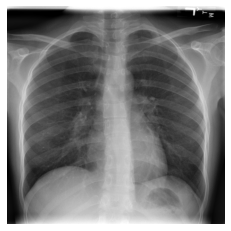

In [74]:
plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

## Combine images into a multidimensional array

## 1 create a three-dimensional array where first dimension corresponds to image number

In [75]:
num_imgs = 9

combined_xray_images_1 = np.array(
    [imageio.v3.imread(os.path.join(DIR, f"00027927_00{i}.png")) for i in range(num_imgs)]
)

## 2 Check the shape of new X-ray image array containing 9 stacked images

In [76]:
combined_xray_images_1.shape

(9, 1024, 1024)

## 3 display health progress by ploting each frames 

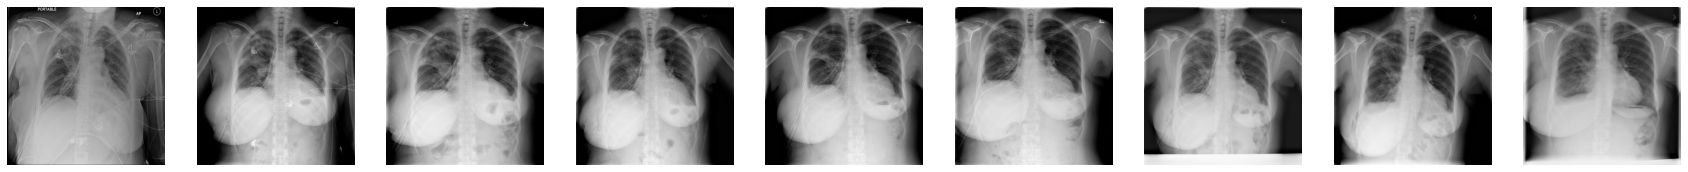

In [77]:
fig, axes = plt.subplots(nrows = 1, ncols=num_imgs, figsize=(30,30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

## 4 create GIF file with imageio.mimwrite() and display in the notebook

In [78]:
GIF_PATH = os.path.join(DIR, "xray_image.gif")
imageio.mimwrite(GIF_PATH, combined_xray_images_1, format=".gif", fps=1)

to embed gif animation in notebook as markdown
== \<img src="FileName.gif" width="750" align="center">

<img src="../datasets/xray_image.gif" width="750" align="center">

## Edge detection using Laplacian-Gaussian, Gaussian gradient, Sobel and Canny Filters

## 1 Call scipy.ndimage.gaussian_laplace() with sigma(scalar) value 1

Multidimensional Gaussian filter

- implemented as a sequence of 1D convolution filter
- n-dimensional laplace filter use Gaussian second derivatives
- laplaci

In [97]:
xray_image_laplace_gaussian = ndimage.gaussian_laplace(xray_image, sigma=1)

## 2. Display original Xray and Laplacian-Gaussian Filter Xray

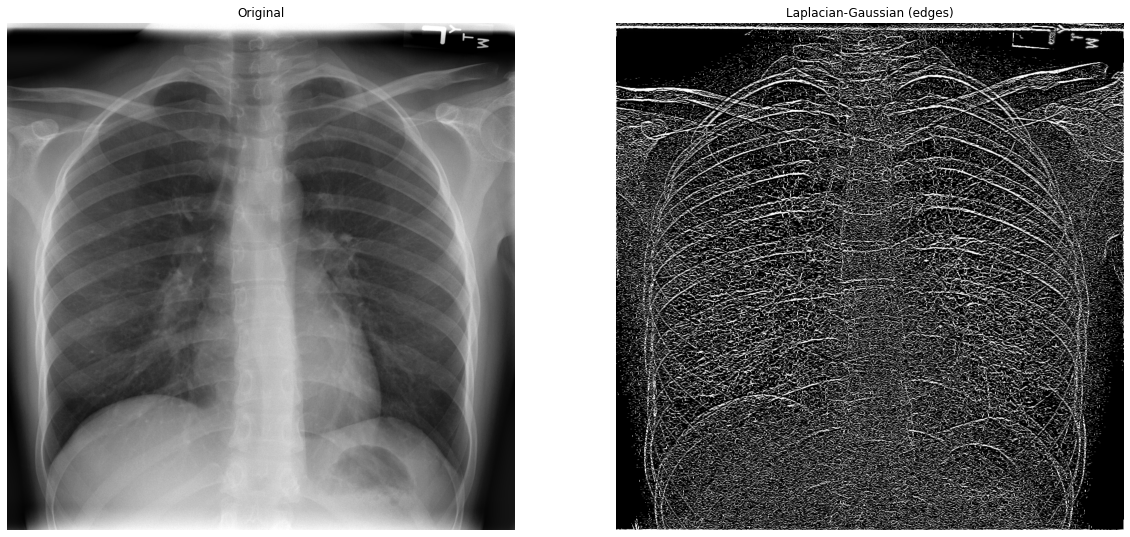

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

## Gaussian Gradient magnitude method

## 1 Call scipy.ndimage.gaussian_gradient_magnitude() with sigma value 2

In [99]:
xray_image_gaussian_gradient = ndimage.gaussian_gradient_magnitude(xray_image, sigma=2)

## 2 Display Original Image and Gaussian gradient filter Image

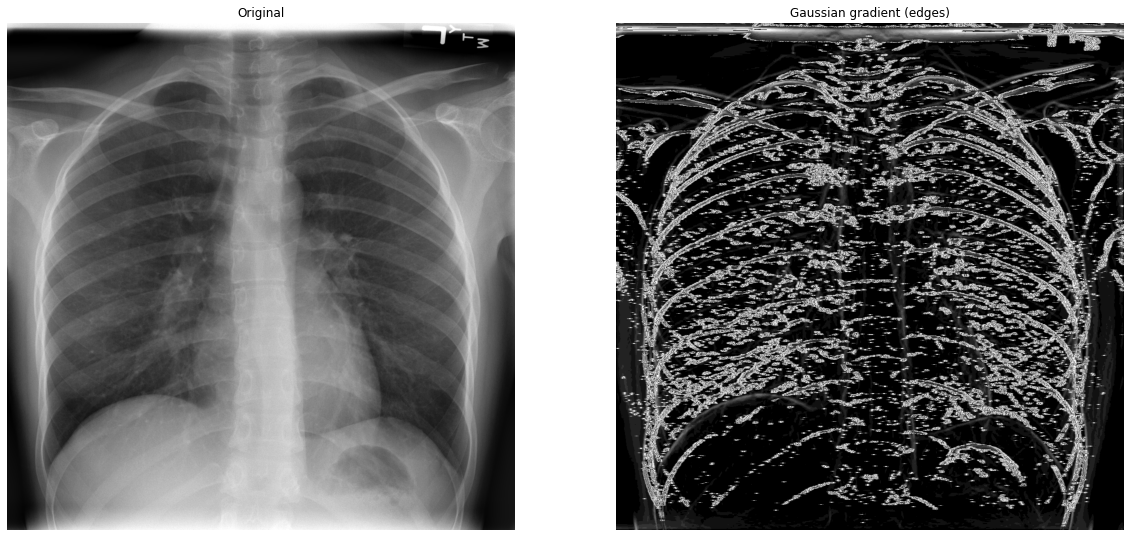

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Gaussian gradient (edges)")
axes[1].imshow(xray_image_gaussian_gradient, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

## Sobel-Feldman operator (Sobel Filter)

To find regions of high spatial frequency (edges or the edge maps) along the horizontal and vertical axes of a 2D Xray image.

- Sobel Filter applies two 3x3 kernel matrices - one for each axis - onto the xray through a convolution

- two points (gradients) are combined using Pythagorean theorem to produce a gradient magnitude

- normalize the rescaled image for the pixel values to be between 0 and 255


In [92]:
# use Sobel filters (scipy.ndimage.sobel()) on x- and y-axes of the X-ray
x_sobel = ndimage.sobel(xray_image, axis=0)
y_sobel = ndimage.sobel(xray_image, axis=1)

# calculate distance between x and y using np.hypot() to obtain the magnitude
xray_image_sobel = np.hypot(x_sobel, y_sobel)

In [93]:
# Image normalize follow output_channel = 255.0 * (input_channel - min_value)/(max_value - min_value)
xray_image_sobel *= 255.0 / np.max(xray_image_sobel)

## 2 Change new image array data type
- 32-bit floating-point from float16 to make it 

In [91]:
print("The data type - before: ", xray_image_sobel.dtype)
xray_image_sobel = xray_image_sobel.astype("float32")
print("The data type - after: ", xray_image_sobel.dtype)

The data type - before:  float16
The data type - after:  float32


## 3 Display original X-ray and Sobel "edge" filter applied
- gray scale and CMRmap color maps

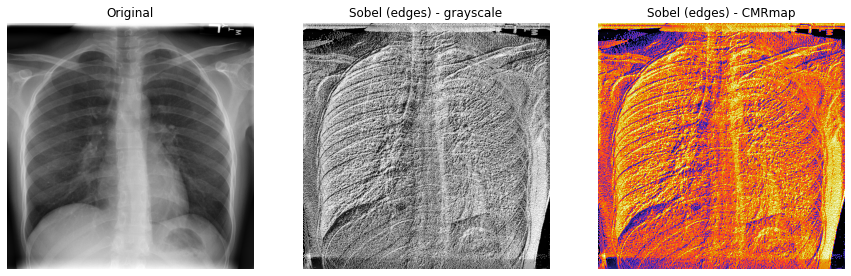

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Sobel (edges) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

## 4 The Canny Filter

### Plot X-ramge and edge detected with Canny Filter
Edges emphasized using `prism`, `nipy_spectral`, and `terrain` colormap

- apply a Gaussian filter to remove the noise in an image.
- Fourier filter which smoothens through convolution process
- apply Prewitt filter on each of the 2 axes of the image to help detect some of the edges this result 2 gradient values
- compute the magnitude between the two gradients using pythagorean theorem
- normalize the images

In [80]:
# fourier filters scipy.ndimage.fourier_gaussian() with a small sigma value to remove noise
fourier_gaussian = ndimage.fourier_gaussian(xray_image, sigma=0.01)


# calculate two gradients using ndimage.prewitt
x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

# measure distance between the gradients using `np.hypot()
xray_image_canny = np.hypot(x_prewitt, y_prewitt)

# normalize the rescaled image
xray_image_canny *= 255.0/np.max(xray_image_canny)

In [81]:
print("The data type - ", xray_image_canny.dtype)

The data type -  float64


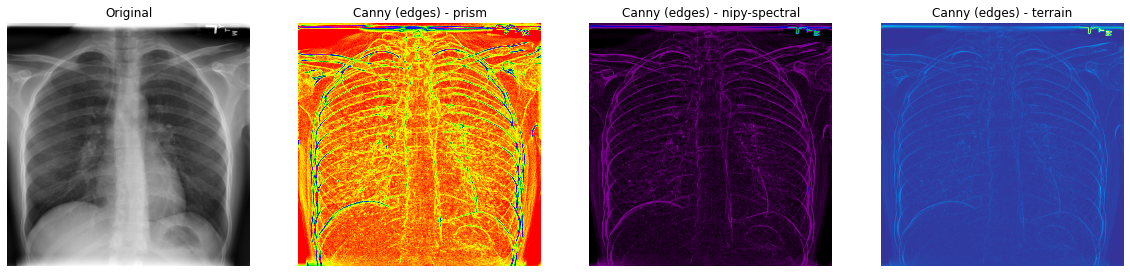

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")
axes[2].set_title("Canny (edges) - nipy-spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")

for i in axes:
    i.axis("off")
    
plt.show()

## Appy masks to X-ray with np.where

In [61]:
print("The data type of the xray image", xray_image.dtype)
print("The minimum pixel value ", np.min(xray_image))
print("The maximum pixel value ", np.max(xray_image))
print("The average pixel value ", np.mean(xray_image))
print("The median pixel value ", np.median(xray_image))

The data type of the xray image uint8
The minimum pixel value  0
The maximum pixel value  255
The average pixel value  108.19216442108154
The median pixel value  103.0


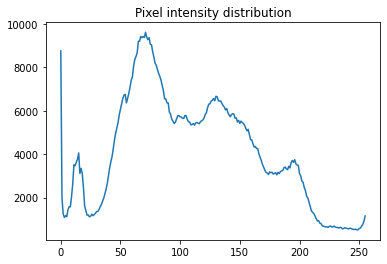

In [60]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

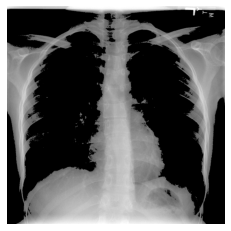

In [59]:
xray_image_mask_noisy = np.where(xray_image >100, xray_image, 0)
plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

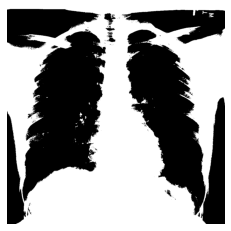

In [58]:
xray_image_mask_less_noisy = np.where(xray_image >100, 1, 0)
plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

### Comparing result

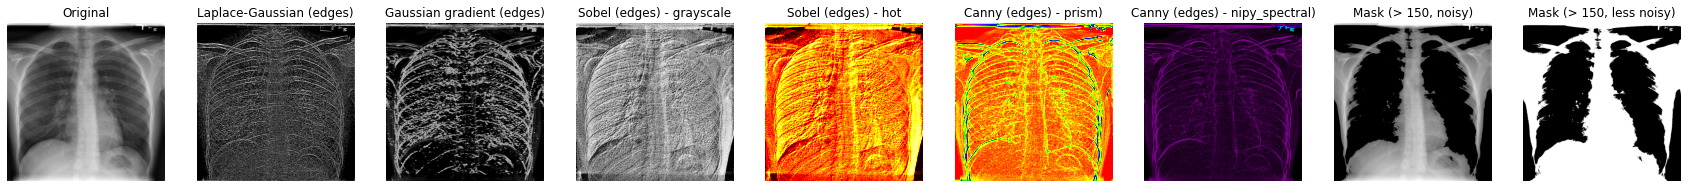

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(xray_image_gaussian_gradient, cmap="gray")
axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")
axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")
axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")
axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")
axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")
axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")

for i in axes:
    i.axis("off")
    
plt.show()